# Analysing data collected from the 'Data Safety' section on Google Play Store

In [1]:
sensitive_data = {
    "Email address": ["GDPR", "Google"],
    "Name": ["GDPR", "Google", "HIPAA"],
    "Device or other IDs": ["Google"],
    "Crash logs": ["Google"],
    "App interactions": ["Google"],
    "Diagnostics": ["Google"],
    "User IDs": ["GDPR", "Google"],
    "Fitness info": ["GDPR", "HIPAA", "Google"],
    "Photos": ["GDPR", "Google"],
    "Health info": ["GDPR", "HIPAA", "Google"],
    "Other user-generated content": ["Google"],
    "Other app performance data": ["Google"],
    "Phone number": ["GDPR", "Google", "HIPAA"],
    "Approximate location": ["GDPR", "Google"],
    "Purchase history": ["GDPR", "Google"],
    "In-app search history": ["Google"],
    "Other in-app messages": ["Google"],
    "Precise location": ["GDPR", "Google"],
    "Address": ["GDPR", "Google", "HIPAA"],
    "Videos": ["GDPR", "Google"],
    "Files/docs": ["Google"],
    "Emails": ["GDPR", "Google"],
    "Sexual orientation": ["GDPR"],
    "User payment info": ["GDPR", "Google"],
    "Contacts": ["GDPR", "Google"],
    "Installed apps": ["Google"],
    "Race/ethnicity": ["GDPR", "HIPAA"],
    "Voice or sound recordings": ["Google"],
    "Calendar events": ["Google"],
    "SMS or MMS": ["Google"],
    "Other financial info": ["GDPR", "Google"],
    "Web browsing history": ["Google"],
    "Political or religious beliefs": ["GDPR"]
}


def mark_sensitive_and_regulation(data_type):
    sensitive = 'Yes' if data_type in sensitive_data else 'No'
    regulations = ', '.join(sensitive_data.get(data_type, []))
    return sensitive, regulations

In [2]:
import re
import pandas as pd

def process_data(data_group):
    data_type_summary = {}
    
    for data_type in data_group:
        if pd.notnull(data_type):
            data_type = data_type.replace('Files and docs', 'Files/docs').replace('Race and ethnicity', 'Race/ethnicity').replace('Emails', 'Email address')
            parts = re.split(r', | and ', data_type)
            for part in parts:
                cleaned_part = part.replace('and', '').strip().rstrip(',')
                if cleaned_part:
                    if cleaned_part not in data_type_summary:
                        data_type_summary[cleaned_part] = {'count': 0, 'Sensitive': None, 'Regulations': None}
                    data_type_summary[cleaned_part]['count'] += 1
                    data_type_summary[cleaned_part]['Sensitive'], data_type_summary[cleaned_part]['Regulations'] = mark_sensitive_and_regulation(cleaned_part)
    
    sorted_data_type_summary = sorted(data_type_summary.items(), key=lambda x: x[1]['count'], reverse=True)
    
    print(f"Number of unique data types: {len(sorted_data_type_summary)}\n")
    print(f"{'Data Type':<35}{'Count':<10}{'Sensitive':<20}{'Regulations'}")
    print("-" * 100)
    
    
    for data_type, info in sorted_data_type_summary:
        print(f"{data_type:<35}{info['count']:<10}{info['Sensitive']:<20}{info['Regulations']}")

    print("\nData Types marked as Sensitive (Yes):")
    print(f"{'Data Type':<35}{'Count':<10}{'Sensitive':<10}{'Regulations'}")
    print("-" * 40)
    
    count = 0
    for data_type, info in sorted_data_type_summary:
        if info['Sensitive'] == 'Yes':  # Check if 'Sensitive' is 'Yes'
            count += 1
            print(f"{data_type:<35}{info['count']:<10}{info['Sensitive']:<10}{info['Regulations']}")
    
    print('\nTotal number of Data Types marked as Sensitive (Yes):', count)
    
    return sorted_data_type_summary

# Data Shared

In [3]:
import pandas as pd

mhealth_apps = pd.read_csv('../data/mhealth_apps.csv')
app_data_shared = pd.read_csv('../data/app_data_shared.csv')
print(f"Number of Apps share data with third parties: {len(app_data_shared['app_id'].unique())} ({(len(app_data_shared['app_id'].unique()) / len(mhealth_apps['app_id'])) * 100:.2f}%)")

Number of Apps share data with third parties: 373 (43.57%)


In [4]:
data_shared_summary = process_data(app_data_shared['data_shared'])

Number of unique data types: 36

Data Type                          Count     Sensitive           Regulations
----------------------------------------------------------------------------------------------------
Device or other IDs                262       Yes                 Google
Crash logs                         211       Yes                 Google
App interactions                   196       Yes                 Google
Diagnostics                        155       Yes                 Google
User IDs                           148       Yes                 GDPR, Google
Email address                      144       Yes                 GDPR, Google
Name                               104       Yes                 GDPR, Google, HIPAA
Other app performance data         102       Yes                 Google
Approximate location               76        Yes                 GDPR, Google
Health info                        71        Yes                 GDPR, HIPAA, Google
Other info               

# Data Collected

In [5]:
import pandas as pd

app_data_collected = pd.read_csv('../data/app_data_collected.csv')
print(f"Number of Apps collecting data: {len(app_data_collected['app_id'].unique())} ({(len(app_data_collected['app_id'].unique()) / len(mhealth_apps['app_id'])) * 100:.2f}%)")

Number of Apps collecting data: 695 (81.19%)


In [6]:
data_collected_summary = process_data(app_data_collected['data_collected'])

Number of unique data types: 36

Data Type                          Count     Sensitive           Regulations
----------------------------------------------------------------------------------------------------
Email address                      606       Yes                 GDPR, Google
Name                               496       Yes                 GDPR, Google, HIPAA
Device or other IDs                493       Yes                 Google
Crash logs                         461       Yes                 Google
App interactions                   448       Yes                 Google
Diagnostics                        362       Yes                 Google
User IDs                           352       Yes                 GDPR, Google
Other info                         289       No                  
Fitness info                       283       Yes                 GDPR, HIPAA, Google
Photos                             265       Yes                 GDPR, Google
Health info                    

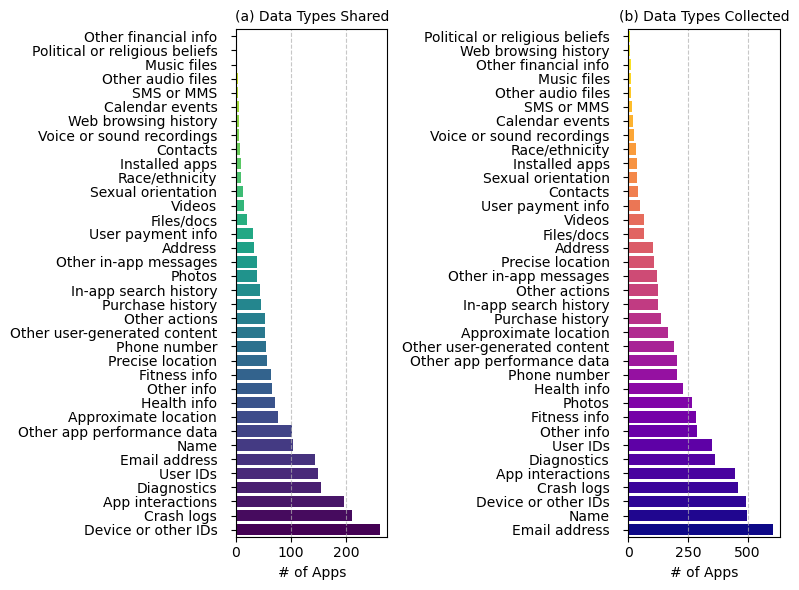

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

data_types_1 = [item[0] for item in data_shared_summary]
counts_1 = [item[1]['count'] for item in data_shared_summary]

sorted_data_1 = sorted(zip(counts_1, data_types_1), reverse=True)
counts_1, data_types_1 = zip(*sorted_data_1)

data_types_2 = [item[0] for item in data_collected_summary]
counts_2 = [item[1]['count'] for item in data_collected_summary]

sorted_data_2 = sorted(zip(counts_2, data_types_2), reverse=True)
counts_2, data_types_2 = zip(*sorted_data_2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))  # 1 row, 2 columns

# Bar plot for "Data Shared"
colors_1 = cm.viridis(np.linspace(0, 1, len(data_types_1)))
ax1.barh(data_types_1, counts_1, color=colors_1, height=0.8)
ax1.set_xlabel('# of Apps', fontsize=10)
ax1.set_title('(a) Data Types Shared', fontsize=10)
ax1.invert_yaxis()  # Reverse the y-axis for descending order
ax1.grid(axis='x', linestyle='--', alpha=0.7)
ax1.tick_params(axis='y', pad=10)  # Increase space between y-ticks and bars
ax1.set_ylim(-0.5, len(data_types_1) - 0.5)  # Adjust y-limit for spacing

# Bar plot for "Data Collected"
colors_2 = cm.plasma(np.linspace(0, 1, len(data_types_2)))
ax2.barh(data_types_2, counts_2, color=colors_2, height=0.8)
ax2.set_xlabel('# of Apps', fontsize=10)
ax2.set_title('(b) Data Types Collected', fontsize=10)
ax2.invert_yaxis()  # Reverse the y-axis for descending order
ax2.grid(axis='x', linestyle='--', alpha=0.7)
ax2.tick_params(axis='y', pad=10)  # Increase space between y-ticks and bars
ax2.set_ylim(-0.5, len(data_types_2) - 0.5)  # Adjust y-limit for spacing

# Adjust layout and add captions for clarity
plt.tight_layout()

# Saving the figure with clear captions
plt.savefig('../figures/shared_and_collected_data_types.png')

# Display the plot
plt.show()


# Security Practices

In [8]:
import pandas as pd

app_security_practices = pd.read_csv('../data/app_security_practices.csv')
print(f"Number of Apps mention security practices: {len(app_security_practices['app_id'].unique())} ({(len(app_security_practices['app_id'].unique()) / len(mhealth_apps['app_id'])) * 100:.2f}%)")

Number of Apps mention security practices: 779 (91.00%)


In [9]:
import re
import pandas as pd

security_practices_summary = {}
mhealth_apps = pd.read_csv("../data/mhealth_apps.csv")
total_apps = len(mhealth_apps['app_id'])

for security_practice in app_security_practices['security_practices']:
    if pd.notnull(security_practice):
        parts = re.split(r', ', security_practice)
        for part in parts:
            cleaned_part = part.strip().rstrip(',')
            if cleaned_part:
                if cleaned_part not in security_practices_summary:
                    security_practices_summary[cleaned_part] = {'count': 0}
                security_practices_summary[cleaned_part]['count'] += 1

sorted_security_practices_summary = sorted(security_practices_summary.items(), key=lambda x: x[1]['count'], reverse=True)
print(f"Number of unique data types: {len(sorted_security_practices_summary)}\n")
print(f"{'Data Type':<50}{'App Count':<15}{'Percentage'}")
print("-" * 100)
for data_type, info in sorted_security_practices_summary:
    print(f"{data_type:<50}{info['count']:<15}{round(int(info['count'])/total_apps*100, 2)}%")


Number of unique data types: 6

Data Type                                         App Count      Percentage
----------------------------------------------------------------------------------------------------
Data is encrypted in transit                      698            81.54%
You can request that data be deleted              630            73.6%
Data can’t be deleted                             119            13.9%
Data isn’t encrypted                              74             8.64%
Committed to follow the Play Families Policy      23             2.69%
Independent security review                       4              0.47%


In [10]:
import pandas as pd

mhealth_apps = pd.read_csv('../data/mhealth_apps.csv')

encryption = app_security_practices[app_security_practices['security_practices'].str.contains("Data isn’t encrypted", na=False)]
encryption = encryption.drop_duplicates(subset='app_id')  
encryption_average_downloads = mhealth_apps[mhealth_apps['app_id'].isin(encryption['app_id'])]['downloads'].mean()

deletion = app_security_practices[app_security_practices['security_practices'].str.contains("Data can’t be deleted", na=False)]
deletion = deletion.drop_duplicates(subset='app_id') 
deletion_average_downloads = mhealth_apps[mhealth_apps['app_id'].isin(deletion['app_id'])]['downloads'].mean()

print(f"Average downloads of Apps that do not encrypt data: {encryption_average_downloads}")
print(f"Average downloads of Apps that do not allow user deletion: {deletion_average_downloads}")


Average downloads of Apps that do not encrypt data: 49901853.175675675
Average downloads of Apps that do not allow user deletion: 94983307.64705883
